<a href="https://colab.research.google.com/github/S-JT/DSEA-CAPSTONE-PROJECT/blob/main/CAPSTONE_PROJECT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
import pandas as pd

# Sample data
path = "/content/drive/MyDrive/DATASETS/TBCSCRAPER_data.csv"
data = pd.read_csv("/content/drive/MyDrive/DATASETS/TBCSCRAPER_data.csv")

# Create a DataFrame
df3 = pd.DataFrame(data)

# Remove non-numeric characters and convert to integer
df3['product.name'] = df3['product.name']
df3['product.price(KES)'] = df3['product.price(KES)'].replace('[^\d]', '', regex=True).astype(int)
df3['previous.price(KES)'] = df3['previous.price(KES)'].replace('[^\d]', '', regex=True).astype(int)
df3['%discount'] = df3['%discount'].replace('[^\d]', '', regex=True).astype(int)

#data = pd.read_csv(r"/content/drive/MyDrive/DATASETS/TBCSCRAPER_data.csv")
#data = pd.read_csv(r"/content/tbc_discount_sales")
# Display the updated DataFrame

print(data)

#df3 = pd.read_csv('content/drive/MyDrive/DATASETS/TBCSCRAPER_data.csv')
#import csv
#with open('tbc_discounts', 'w+', newline='', encoding='UTF8') as f:
 # writer = csv.writer(f)
  #writer.writerow(data)

                                         product.name product.price(KES)  \
0           Lenovo LOQ 3 Gaming Series i5 8GB 512GB …        KES 149,500   
1        Asus ExpertBook B3 Flip i7 8GB, 512GB SSD, …        KES 169,100   
2              Usborne Step-By-Step Drawing Dinosaurs          KES 1,000   
3             Asus VivoBook X1400 i7-1165G7 8GB 512GB        KES 100,999   
4   Usborne Lift-the-flap Quest & Answers about Di...          KES 1,200   
5                     Usborne Book & Jigsaw Dinosaurs          KES 1,000   
6                            Usborne Pop-up Dinosaurs          KES 1,500   
7   Asus UP5401 i7-12700H 16GB 512GBSSD Win11 Hme ...        KES 187,500   
8            Usborne Fingerprint Activities Dinosaurs          KES 1,200   
9      ASUS Vivobook Go 15 E510MA Celeron 4GB 256GB …         KES 29,999   
10                        Usborne Dinosaur Snap Cards            KES 600   
11                  See Inside the World of Dinosaurs          KES 1,500   
12  Asus ROG

In [ ]:
df3.dtypes

,0
product.name,object
product.price(KES),int64
previous.price(KES),int64
%discount,int64


In [ ]:
df3.drop_duplicates()

,product.name,product.price(KES),previous.price(KES),%discount
0,Lenovo LOQ 3 Gaming Series i5 8GB 512GB …,149500,157500,5
1,"Asus ExpertBook B3 Flip i7 8GB, 512GB SSD, …",169100,178000,5
2,Usborne Step-By-Step Drawing Dinosaurs,1000,1400,28
3,Asus VivoBook X1400 i7-1165G7 8GB 512GB,100999,102500,1
4,Usborne Lift-the-flap Quest & Answers about Di...,1200,1790,32
5,Usborne Book & Jigsaw Dinosaurs,1000,1650,39
6,Usborne Pop-up Dinosaurs,1500,1990,24
7,Asus UP5401 i7-12700H 16GB 512GBSSD Win11 Hme ...,187500,220000,14
8,Usborne Fingerprint Activities Dinosaurs,1200,1790,32
9,ASUS Vivobook Go 15 E510MA Celeron 4GB 256GB …,29999,41500,27


In [ ]:
df3.drop_duplicates(subset=['product.name','product.price(KES)','previous.price(KES)','%discount'])

,product.name,product.price(KES),previous.price(KES),%discount
0,Lenovo LOQ 3 Gaming Series i5 8GB 512GB …,149500,157500,5
1,"Asus ExpertBook B3 Flip i7 8GB, 512GB SSD, …",169100,178000,5
2,Usborne Step-By-Step Drawing Dinosaurs,1000,1400,28
3,Asus VivoBook X1400 i7-1165G7 8GB 512GB,100999,102500,1
4,Usborne Lift-the-flap Quest & Answers about Di...,1200,1790,32
5,Usborne Book & Jigsaw Dinosaurs,1000,1650,39
6,Usborne Pop-up Dinosaurs,1500,1990,24
7,Asus UP5401 i7-12700H 16GB 512GBSSD Win11 Hme ...,187500,220000,14
8,Usborne Fingerprint Activities Dinosaurs,1200,1790,32
9,ASUS Vivobook Go 15 E510MA Celeron 4GB 256GB …,29999,41500,27


In [ ]:
from google.colab import files
import pandas as pd

df3.drop_duplicates(subset=['product.name','product.price(KES)','previous.price(KES)','%discount']).to_csv('df4.csv')

#files.download('df4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

CORRELATION OF VARIABLES: LETS LOOK AT THE RELATIONSHIP BETWEEN CURRENT PRICE AND PERCENTAGE DISCOUNT. Findings indicate that these two varriables are interdependent and has a high negative linear relationship

(0.0, 52.8635231385749)

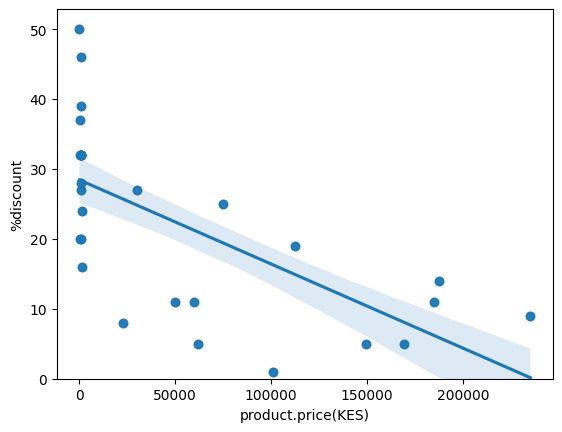

In [ ]:
sns.regplot(x="product.price(KES)", y = "%discount", data =df3)
plt.ylim(0,)

The pearson correlation between different variables can be calculated using the scipy function as indicated below: The table below indicates how each varriable relates to each other. Where the p value is nearer to 1, that is indicative of a stronger correlation and vice versa.
There is a high corelation matrix between the percentage discount to the previous price.

In [ ]:
df3_numeric = df3.select_dtypes(include=[float,int])
corr_matrix = df3_numeric.corr()
corr_matrix

,product.price(KES),previous.price(KES),%discount
product.price(KES),1.000000,0.997094,-0.661823
previous.price(KES),0.997094,1.000000,-0.640819
%discount,-0.661823,-0.640819,1.000000
